In [ ]:
'''
We should not use the entire dataset for training and give random values to test our model.
Instead, we should use 80% of the dataset to train our model and test it using the remaining 20% of the dataset.

'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [2]:
df = pd.read_csv("Datasets/carprices_train_test.csv")
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


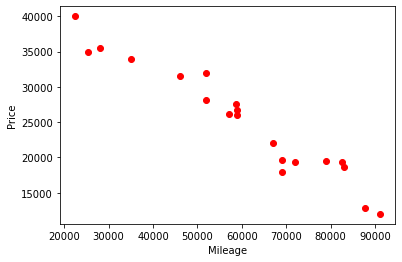

In [3]:
#Let us see the relation between mileage and price
plt.xlabel("Mileage")
plt.ylabel("Price")
x = df['Mileage']
y = df['Sell Price($)']
plt.scatter(x,y, color = "red")

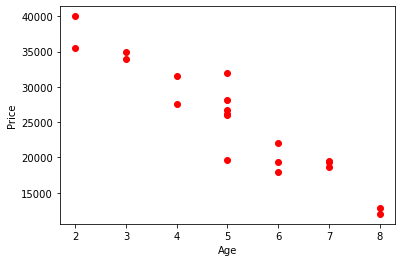

In [4]:
#Let us see the relation between age and price
plt.xlabel("Age")
plt.ylabel("Price")
x = df['Age(yrs)']
y = df['Sell Price($)']
plt.scatter(x,y, color = "red")

In [5]:
#lets split this dataset into X (independent variables) and y(dependent variable)
X = df[['Mileage','Age(yrs)']]
X

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [6]:
y = df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell Price($), dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
#below statement specifies that the X and y datasets are to be split into 80/20 ratio.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [12]:
X.shape

(20, 2)

In [13]:
X_train.shape

(16, 2)

In [14]:
X_test.shape

(4, 2)

In [ ]:
#we see above that X has total 20 rows and X_train has 16 rows (80% of total) and X_test has 4 rows (20% of total)

In [15]:
X_train

,Mileage,Age(yrs)
10,83000,7
13,58780,4
9,67000,6
3,22500,2
15,25400,3
4,46000,4
17,69000,5
16,28000,2
2,57000,5
6,52000,5


In [ ]:
#Above we observe that the X_train does not contain the first 16 samples but chose the random entries
#so every time we run X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2), we get different samples
#if we want the same samples to be picked everytime, we need to use random_state = 10 after the test_size parameter

In [16]:
model = linear_model.LinearRegression()

In [17]:
model.fit(X_train,y_train)

LinearRegression()

In [73]:
#let us predict the prices for mileage values in X_test
predicted_values = model.predict(X_test)
predicted_values

array([25768.88848913, 34255.73401337, 15745.01711318, 22256.92435145])

In [76]:
#below are the actual price values given for the mileage values in X_test
y_test.info()


<class 'pandas.core.series.Series'>
Int64Index: 4 entries, 5 to 0
Series name: Sell Price($)
Non-Null Count  Dtype
--------------  -----
4 non-null      int64
dtypes: int64(1)
memory usage: 236.0 bytes


In [64]:
#let us check the accuracy of the model
model.score(X_test,y_test)

0.8946324073130977

In [30]:
'''let us use the same data to calculate the metrics of the linear regression

Mean Squared Error
The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.
MSE is also known as cost function and can be written as 

cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
Where
n = len(x)
learning_rate = 10000
y_predicted = m_curr * x + b_curr
m_derivative = -(2/n) * sum(x*(y-y_predicted))
b_derivative = -(2/n) * sum(y-y_predicted)
m_curr = m_curr - learning_rate * m_derivative
b_curr = b_curr - learning_rate * b_derivative
'''


'let us use the same data to calculate the metrics of the linear regression\n\nMean Squared Error\nThe MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.\nMSE is also known as cost function and can be written as \n\ncost = (1/n) * sum([val**2 for val in (y-y_predicted)])\nWhere\nn = len(x)\nlearning_rate = 10000\ny_predicted = m_curr * x + b_curr\nm_derivative = -(2/n) * sum(x*(y-y_predicted))\nb_derivative = -(2/n) * sum(y-y_predicted)\nm_curr = m_curr - learning_rate * m_derivative\nb_curr = b_curr - learning_rate * b_derivative\n'

In [77]:
expected = y_test.tolist()
expected

[26750, 34000, 12800, 18000]

In [78]:
predicted = predicted_values.tolist()
predicted

[25768.888489131234, 34255.73401337098, 15745.017113180162, 22256.9243514461]

In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
mse = mean_squared_error(expected,predicted)
print("MSE = ",mse)
rmse = math.sqrt(mse)
print("EMSE = ",rmse)
mae = mean_absolute_error(expected,predicted)
print("MAE = ",mae)

MSE =  6955627.603303212
EMSE =  2637.3523851209593
MAE =  2109.6967472165024


>26750.0, 25768.9 = 962579.8
>34000.0, 34255.7 = 65399.9
>12800.0, 15745.0 = 8673125.8
>18000.0, 22256.9 = 18121404.9


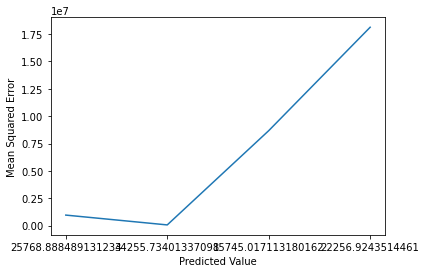

In [85]:
#MEAN SQUARED ERROR
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# calculate errors
errors = list()
for i in range(len(expected)):
	# calculate error
	err = (expected[i] - predicted[i])**2
	# store error
	errors.append(err)
	# report error
	print('>%.1f, %.1f = %.1f' % (expected[i], predicted[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()

>26750.0, 25768.9 = 981.1
>34000.0, 34255.7 = 255.7
>12800.0, 15745.0 = 2945.0
>18000.0, 22256.9 = 4256.9


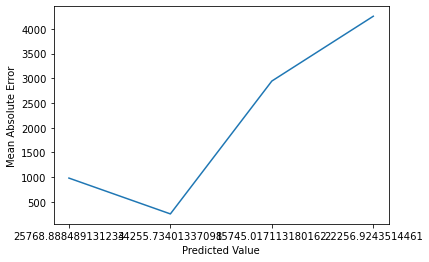

In [86]:
#MEAN ABSOLUTE ERROR
# plot of the increase of mean absolute error with prediction error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# calculate errors
errors = list()
for i in range(len(expected)):
	# calculate error
	err = abs((expected[i] - predicted[i]))
	# store error
	errors.append(err)
	# report error
	print('>%.1f, %.1f = %.1f' % (expected[i], predicted[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Absolute Error')
pyplot.show()
